# House Prices: Ames Iowa - Exploratory Analysis and Visualization

#### Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#### Data Import

In [2]:
data_describe = open("data/data_description.txt")
contents = data_describe.read()
print(contents)
data_describe.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

Text(0.5, 1, 'Visualization of Missing Values in the Test Set')

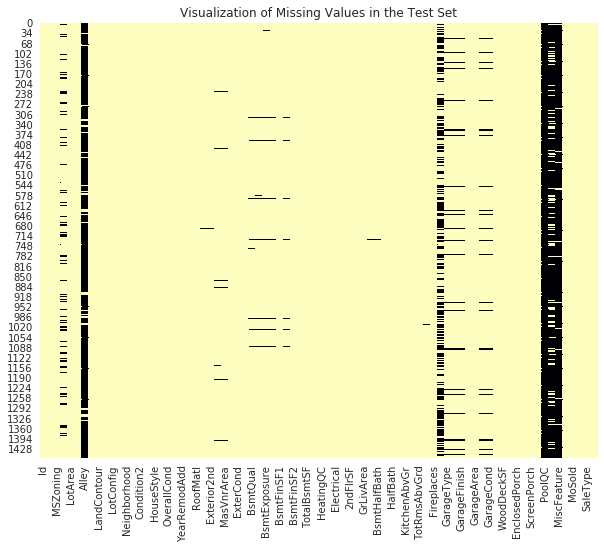

In [4]:
#Reviewing test set for missings
plt.figure(figsize=(10,8))
sns.heatmap(pd.isnull(test), cbar = False, cmap = "magma_r")
plt.title("Visualization of Missing Values in the Test Set")

## Exploratory Analysis

In [5]:
pd.set_option("display.max.columns", 999)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0.5, 1, 'Visualization of Missing Values in the Training Set')

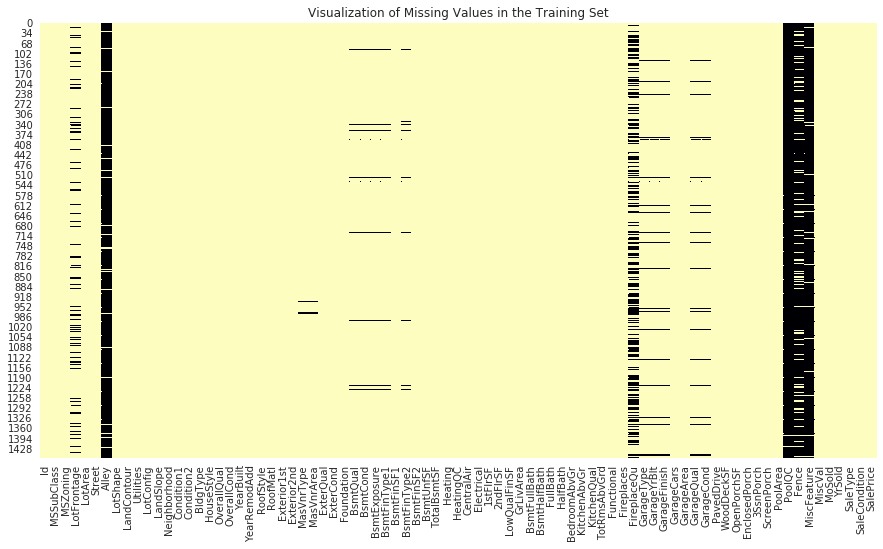

In [7]:
#visualizing the training set
plt.figure(figsize=(15,8))
sns.heatmap(pd.isnull(train), cbar = False, cmap = "magma_r")
plt.title("Visualization of Missing Values in the Training Set")

In [8]:
pd.isnull(train).cumsum().iloc[-1:,:]/1460

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,0.0,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

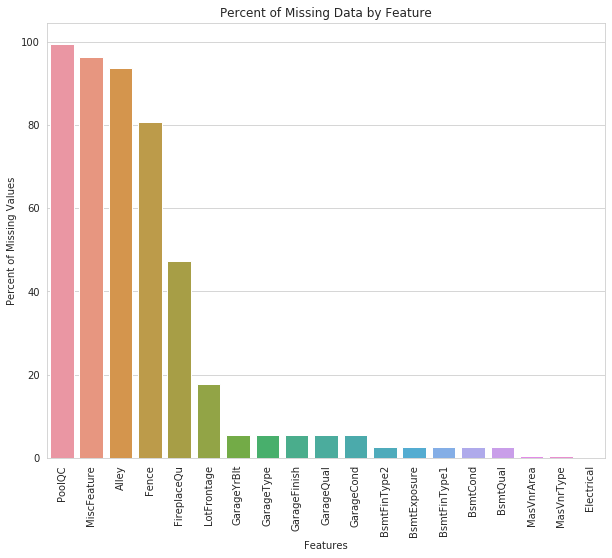

In [9]:
train_isna = (train.isnull().sum() / len(train))*100 
train_isna = train_isna.drop(train_isna[train_isna == 0].index).sort_values(ascending = False)[:30]
plt.figure(figsize = (10,8))
sns.barplot(x = train_isna.index, y = train_isna)
plt.xlabel("Features")
plt.ylabel("Percent of Missing Values")
plt.title("Percent of Missing Data by Feature")
plt.xticks(rotation = "vertical")

The above shows the percentage of missings for each variable, while the heatmap visually represents the location of each of the missings in the data frame. 

There are 6 variables which have more than 10% of their observations missing, 4 of which have missing percentages over 80%. Of these four, Alley (93.77%), PoolQC (99.52%), and MiscFeature (96.30%) are missing the most of ther observations, as the majority of these properties do not have these features. Fence is missing the next most at 80.75%, more than 80 percent of the properties do not have fences. 

The remaining two most missing variables are Fireplace quality (47.26%) and Lot Frontage (17.74%), the latter of which gives the linear feet of street connected to the property. The missings here indicate the lack of a fireplace or that the propoerty is not adjacent to the street.

Although all other variables are less than 6% missing, there are a few patterns in the missings where certain variables are obviously linked. In the center of the plot above we have some clearly linked missing observations, as well as at the far right side of the plot. The center linked missing are all describing the basement of the house. The basementQc variable is NA when the house does not have a  basement, explaining the linkage. Simmilarly, those on the right hand side of the plot have to do with the garage, and again the garageQc variable is NA when there is no garage. 

### Sales Prices

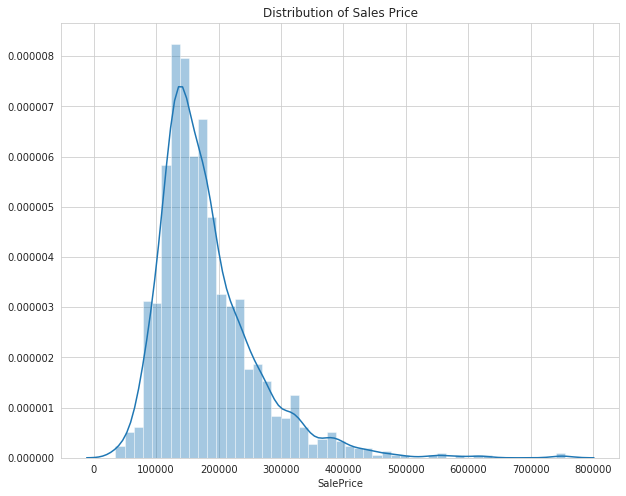

Skew of Sales Price: 1.882876
Kurtosis of Sales Price: 6.536282


In [10]:
plt.figure(figsize = (10,8))
sns.distplot(train["SalePrice"])
plt.title("Distribution of Sales Price")
plt.savefig("Images/SalePrice_dist.png")
plt.show()
print("Skew of Sales Price: %f" % train["SalePrice"].skew())
print("Kurtosis of Sales Price: %f" % train["SalePrice"].kurtosis())

In [11]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Correlation Analysis

In [12]:
corr = train.iloc[:,1:].corr() #Don't want to include ID
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

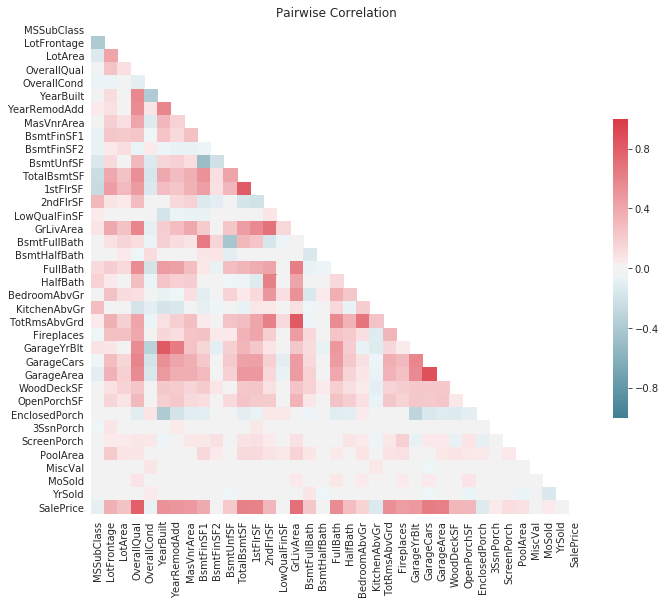

In [13]:
f, ax = plt.subplots(figsize=(11, 11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap = cmap,vmin = -1, vmax = 1, center = 0, square = True, cbar_kws={"shrink":0.5})
plt.title("Pairwise Correlation")
plt.savefig("Images/CorrPlot.png")

#### Correlation Analysis:

Although I am interested in the pairwise correlation of all variables, such that I can build the most successful models, let's first consider only the last row off the correlation heatmap above, which shows the pairwise correlation of all variables with SalePrice.

Although somewhat counter intuitive, I will first address those variables most weakly associated with Sales Price. I'm doing this as the majoriity of the variables (logically) are notably correlated with the Sales price, while there are very few which are weakly correlated with the sales price. 

Below are the variables which are most negatively correlated with the sales price, as well as those which are most weakly correlated. Negative and weak correlations are not generally connected, it merely happens that the weakest (closest to 0) correlations in this data set are often negative.

The variables with the absolute weakest correlation with Sales Price are, respectively: 
* BsmtFinSF2 (Type 2 finished basement SF)
* BsmtHalfBath (Number of half baths in the basement)
* MiscVal (Value of corresponding misc. feature)
* LowQualFinSF (Low Quality finished SF)
* YrSold (Year Sold)
* 3SsnPorch (Three season porch area in SF)
* MoSold (Month Sold)

In [14]:
corr["SalePrice"].sort_values(ascending = True)[1:14]

EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
Name: SalePrice, dtype: float64

The top 15 variables correlated with the sales price are listed below. The most highly correlated of these are Overall Quality, above ground living area, the size of the garage in car capacity, the area of the garage, total basement square footage, and the square footage of the first floor, respectively. 

In [15]:
corr["SalePrice"].sort_values(ascending = False)[1:16]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64

#### Highly Correlated With SalePrice

##### Overall Quality

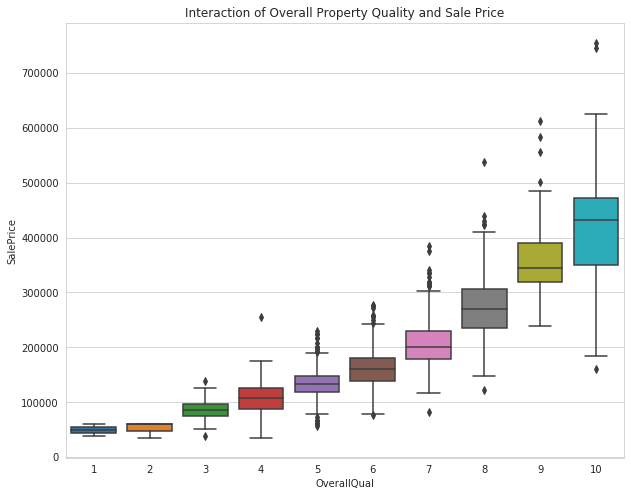

In [16]:
#Boxplots for sale price over quality levels
plt.figure(figsize = (10,8))
sns.boxplot(train["OverallQual"], train["SalePrice"])
plt.title("Interaction of Overall Property Quality and Sale Price")
plt.savefig("Images/OverallQual_vs_SalePrice.png")

There is a clear relationship between the sale price and the overall quality of the properties. 

##### Above Ground Living Area

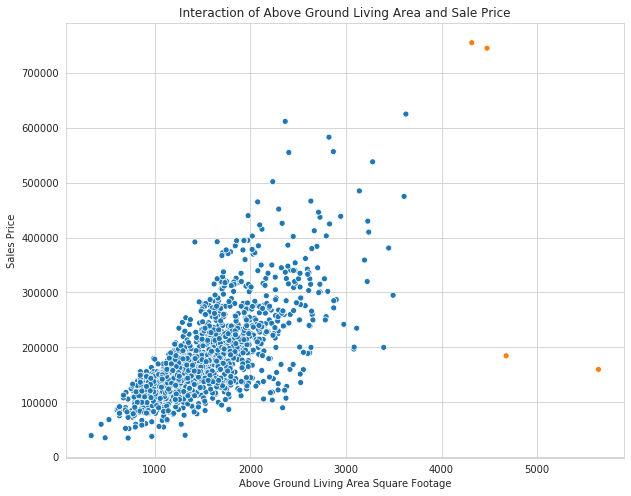

In [17]:
plt.figure(figsize = (10,8))
sns.scatterplot(train["GrLivArea"], train["SalePrice"], hue = train["GrLivArea"] > 4000)
plt.title("Interaction of Above Ground Living Area and Sale Price")
plt.legend().remove()
plt.xlabel("Above Ground Living Area Square Footage")
plt.ylabel("Sales Price")
plt.savefig("Images/AbGrLivArea_vs_SalePrice.png")

The plot above has four points marked in orange, two of which (those in the lower right hand corner) are not following the trend set by the majority of the data. These properties have notably high high above ground living area but still sold for relatively little. I've marked these points in a few of the plots below as well, to review if they continue to display unexpected behaviors.

Additionally, in the paper written by the auther of the Ames data set, he reccomends that all of the properties with above ground living space greater than 4000 SqF be treated as outliers and that they should be removed from the data set. 

In [18]:
train[train["GrLivArea"] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [19]:
#Dropping houses with above ground living area
#greater than 4000
index_drop = train[train["GrLivArea"] > 4000].index
train.drop(index = index_drop, inplace = True)
train.reset_index(drop = True, inplace = True)

As the data set contains multiple features which describe the square footage of the properties, I want to review the relationship between these variables. I'll review the sum of the first and second floor square footage below, as well as the relationship between the 1st floor and the basement.

Text(0, 0.5, 'Sum of 1st and 2nd Floor SqF')

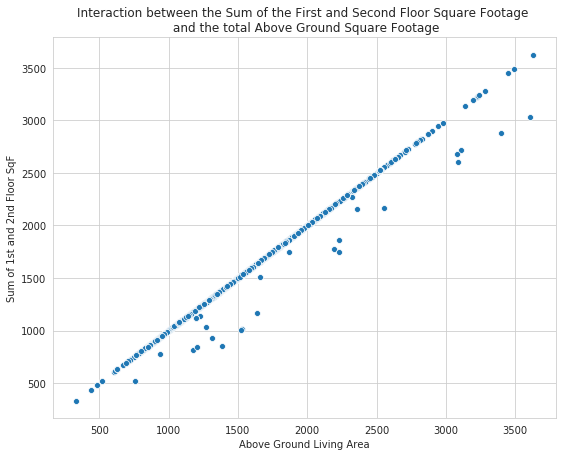

In [20]:
#Reviewing the interaction between the sum
#of the 1st and 2nd floor and the total above ground living area
Sum_1st_2nd = train["1stFlrSF"] + train["2ndFlrSF"]
plt.figure(figsize = (9,7))
sns.scatterplot(train["GrLivArea"], Sum_1st_2nd)
plt.title("Interaction between the Sum of the First and Second Floor Square Footage \n and the total Above Ground Square Footage")
plt.xlabel("Above Ground Living Area")
plt.ylabel("Sum of 1st and 2nd Floor SqF")

Although not unexpected, the clear functional relationship between the total above ground square footage and the square footage of the first and second floors will be a nuisance when modeling. (The relationship is clearly 1stFlrSF + 2ndFlrSF = GrLivArea). As such, I'll be creating a "Total property square footage" variable in my modeling, which will combine the GrLivArea and TotalBsmtSF, and then I will drop all of the other square footage variables.

##### Total Basement Square Footage

Text(0, 0.5, 'Sales Price')

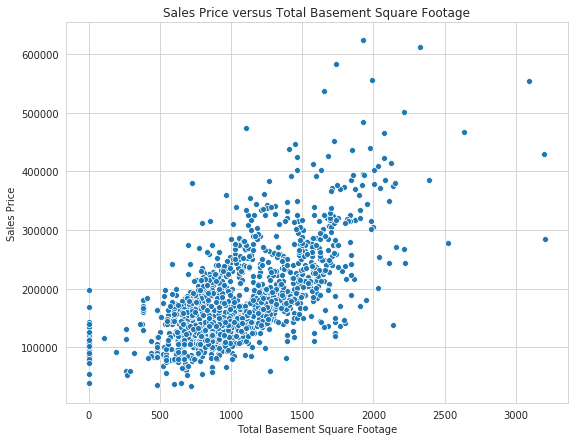

In [21]:
#Visualization of Total basement sq footage vs sales price
plt.figure(figsize = (9,7))
sns.scatterplot(train["TotalBsmtSF"], train["SalePrice"])
plt.title("Sales Price versus Total Basement Square Footage")
plt.xlabel("Total Basement Square Footage")
plt.ylabel("Sales Price")

Although there seem to be a few houses with unusually large basements for their price, the majority of the properties seem to be following a linear relationship.

##### First Floor SF

Text(0, 0.5, 'Sales Price')

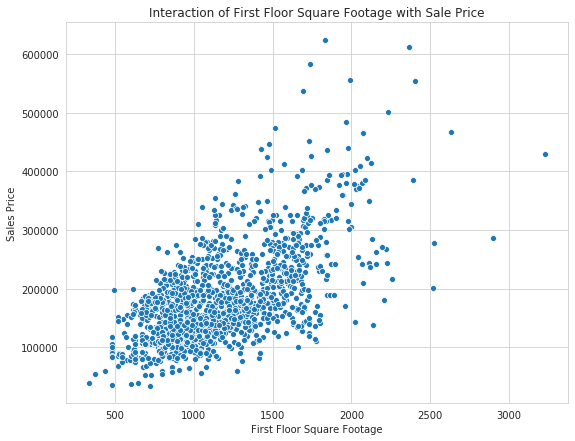

In [22]:
plt.figure(figsize = (9,7))
sns.scatterplot(train["1stFlrSF"], train["SalePrice"])
plt.title("Interaction of First Floor Square Footage with Sale Price")
plt.xlabel("First Floor Square Footage")
plt.ylabel("Sales Price")

Again one can see a clear liner relationship between the sales price and the first floor square footage. It does appear that the variance is increasing as the sales price and square footage increase, which is somewhat worriesome for the future models I'll be creating. I'll most likely end up handling this with a log transformation later on.

Let's now review the relationship between the basement and 1st floor square footage.

Text(0, 0.5, 'Basement Square Footage')

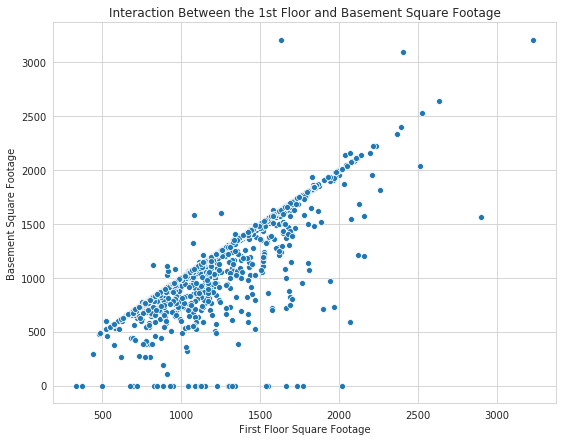

In [23]:
plt.figure(figsize=(9,7))
sns.scatterplot(train["1stFlrSF"], train["TotalBsmtSF"])
plt.title("Interaction Between the 1st Floor and Basement Square Footage")
plt.xlabel("First Floor Square Footage")
plt.ylabel("Basement Square Footage")

Although the linear relationship between these two variables is not as clear as with (1stFlrSF + 2ndFlrSF) and GrLivArea above, there is still a prominent relationship. I'm not too concerned about this at this point, as I've already decided to dop thse variables in favor of a total property square footage variable.

##### Grarage Car Capacity

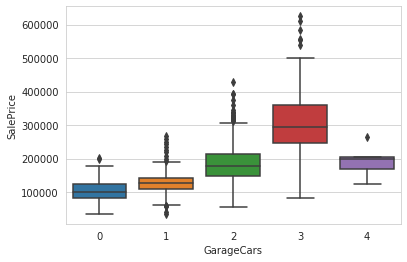

In [24]:
sns.boxplot(train["GarageCars"], train["SalePrice"])

In [25]:
train["SalePrice"].groupby(train["GarageCars"]).describe()

,count,mean,std,min,25%,50%,75%,max
GarageCars,,,,,,,,
0,81.0,103317.283951,32815.023389,34900.0,82500.0,100000.0,124000.00,200500.0
1,369.0,128116.688347,30412.386890,35311.0,110000.0,128000.0,142000.00,266500.0
2,823.0,183880.645200,51641.823385,55993.0,148000.0,178000.0,213000.00,430000.0
3,178.0,305389.820225,96483.146447,81000.0,246933.5,294038.5,361439.25,625000.0
4,5.0,192655.800000,52621.839745,123000.0,168000.0,200000.0,206300.00,265979.0


The "4 car garage" level is notably underrepresented in the data set, so I'll be combining it with the "3 car garage" level which will describe all properties with car capacity equal to or greater than 3.

In [26]:
train.loc[train["GarageCars"] == 4, "GarageCars"] = 3

Text(0, 0.5, 'Sales Price')

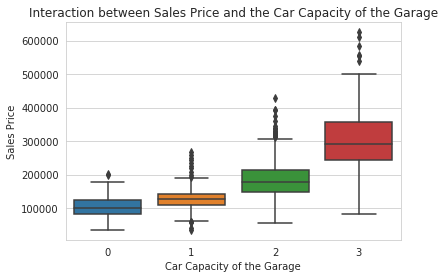

In [27]:
#Visualization for Salesprice and GarageCars
sns.boxplot(train["GarageCars"], train["SalePrice"])
plt.title("Interaction between Sales Price and the Car Capacity of the Garage")
plt.xlabel("Car Capacity of the Garage")
plt.ylabel("Sales Price")

In [28]:
pd.crosstab(train["GarageQual"], train["GarageCond"])

GarageCond,Ex,Fa,Gd,Po,TA
GarageQual,,,,,
Ex,2,0,0,0,1
Fa,0,20,0,4,24
Gd,0,0,4,0,10
Po,0,0,0,3,0
TA,0,15,5,0,1287


##### Number of Full Baths in the Property

Text(0, 0.5, 'Sales Price')

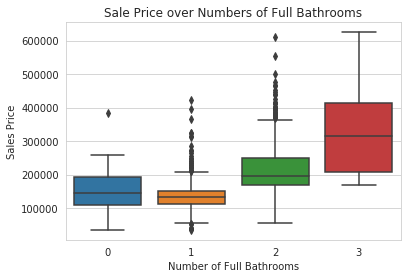

In [29]:
#Visualization of Saleprice vs FullBath
sns.boxplot(train["FullBath"], train["SalePrice"])
plt.title("Sale Price over Numbers of Full Bathrooms")
plt.xlabel("Number of Full Bathrooms")
plt.ylabel("Sales Price")

In [30]:
train["SalePrice"].groupby(train["FullBath"]).describe()

,count,mean,std,min,25%,50%,75%,max
FullBath,,,,,,,,
0,9.0,165200.888889,106083.806001,35311.0,108959.0,145000.0,194201.0,385000.0
1,650.0,134751.440000,41565.080488,34900.0,112000.0,132375.0,150562.5,423000.0
2,767.0,213078.938722,72468.743559,55000.0,168750.0,197000.0,248164.0,611657.0
3,30.0,326446.866667,132524.019307,170000.0,206718.0,314500.0,413902.5,625000.0


The "0" level is notably underrepresented in the data set, so I'll be combining it with the 1 bedroom level.

In [31]:
train.loc[train["FullBath"] == 0, "FullBath"] = 1

Text(0, 0.5, 'Sales Price')

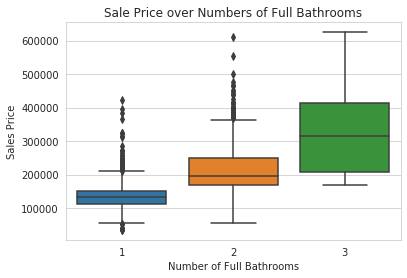

In [32]:
#Visualization of Saleprice vs FullBath
#Combined levels
sns.boxplot(train["FullBath"], train["SalePrice"])
plt.title("Sale Price over Numbers of Full Bathrooms")
plt.xlabel("Number of Full Bathrooms")
plt.ylabel("Sales Price")

##### Total Number of Rooms Above Ground Level

Text(0.5, 0, 'Total Rooms Above Ground.')

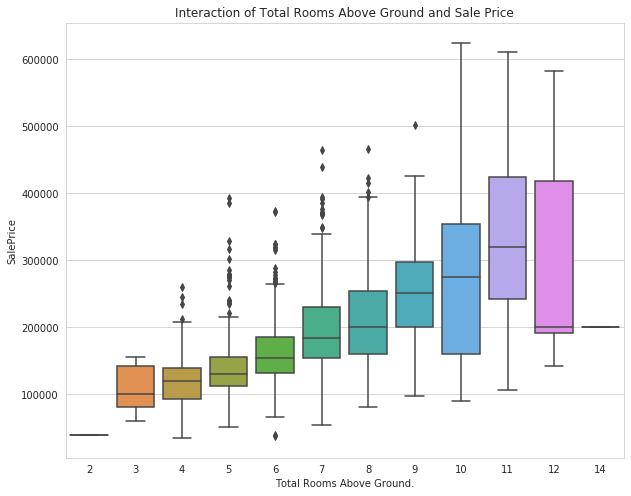

In [33]:
plt.figure(figsize = (10,8))
sns.boxplot(train["TotRmsAbvGrd"], train["SalePrice"])
plt.title("Interaction of Total Rooms Above Ground and Sale Price")
plt.xlabel("Total Rooms Above Ground.")

In [34]:
train["SalePrice"].groupby(train["TotRmsAbvGrd"]).describe()

,count,mean,std,min,25%,50%,75%,max
TotRmsAbvGrd,,,,,,,,
2,1.0,39300.000000,NaN,39300.0,39300.0,39300.0,39300.0,39300.0
3,17.0,111217.647059,33108.103904,60000.0,81000.0,100000.0,143000.0,155900.0
4,97.0,122844.628866,41661.805370,34900.0,93000.0,120500.0,140000.0,260000.0
5,275.0,141550.749091,49656.905700,52000.0,112500.0,130250.0,156000.0,392500.0
6,402.0,161303.296020,48707.372941,37900.0,131625.0,155000.0,185000.0,374000.0
7,329.0,196666.784195,64404.686026,55000.0,155000.0,184100.0,230000.0,465000.0
8,187.0,213427.529412,73985.715639,81000.0,160500.0,200000.0,254096.5,466500.0
9,75.0,252988.173333,83131.922273,98000.0,200362.0,252000.0,298000.0,501837.0
10,45.0,276113.800000,123902.007095,90000.0,160000.0,276000.0,354000.0,625000.0


The 11, 12, and 14 room properties are underrepresented. I'll be combining them with the 10 rooms level to indicate if tthere are 10 or more rooms above ground level in the property. I'll also making a new level for properties with 3 or fewer rooms above ground. 

In [35]:
train.loc[train["TotRmsAbvGrd"] < 3, "TotRmsAbvGrd"] = 3
train.loc[train["TotRmsAbvGrd"] >= 10, "TotRmsAbvGrd"] = 10

Text(0.5, 0, 'Total Rooms Above Ground.')

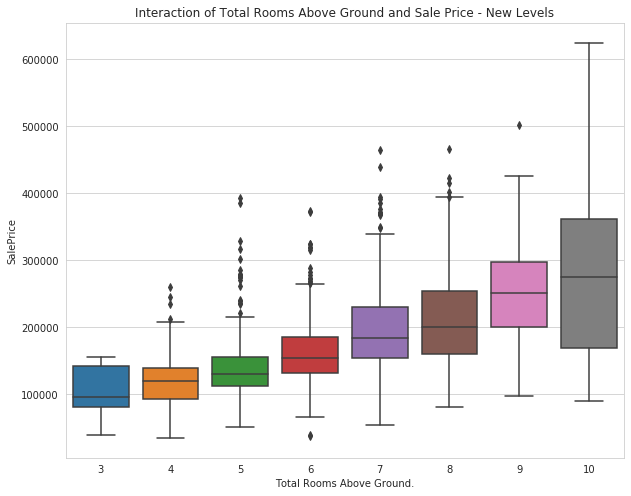

In [36]:
plt.figure(figsize = (10,8))
sns.boxplot(train["TotRmsAbvGrd"], train["SalePrice"])
plt.title("Interaction of Total Rooms Above Ground and Sale Price - New Levels")
plt.xlabel("Total Rooms Above Ground.")

##### Year Built

Text(0.5, 1.0, 'Interaction of Year Built and Sale Price')

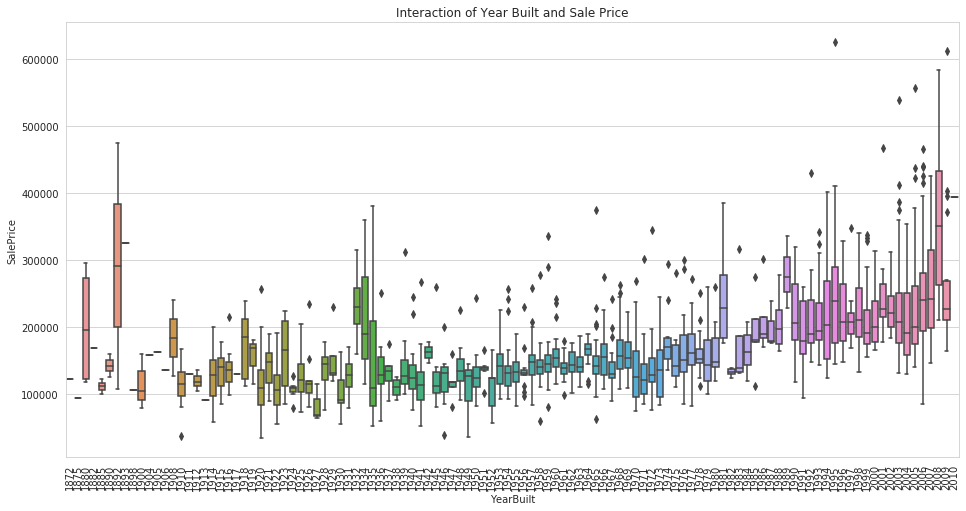

In [37]:
plt.figure(figsize = (16,8))
sns.boxplot(train["YearBuilt"], train["SalePrice"])

plt.xticks(rotation = "vertical")
plt.title("Interaction of Year Built and Sale Price")

Note that the sale price and the year the property was built are correlated, the year of the sale and the sale price are very very weakly correlated. As such, people may be willing to spend more on a newer house, but they are not willing to pay more throughout the years. This indicates that either houses in Ames Iowa have not increased in value and the average house price has not increased over the years, or some sort of scaling must have been done on the sale price data to account for inflation/housing market changes.

##### Year Remodeled

This is identical to the year built if there has been no remodel on the house. Otherwise this shows the remodel date.

Text(0.5, 1.0, 'Interaction of Year Remodeled and Sale Price')

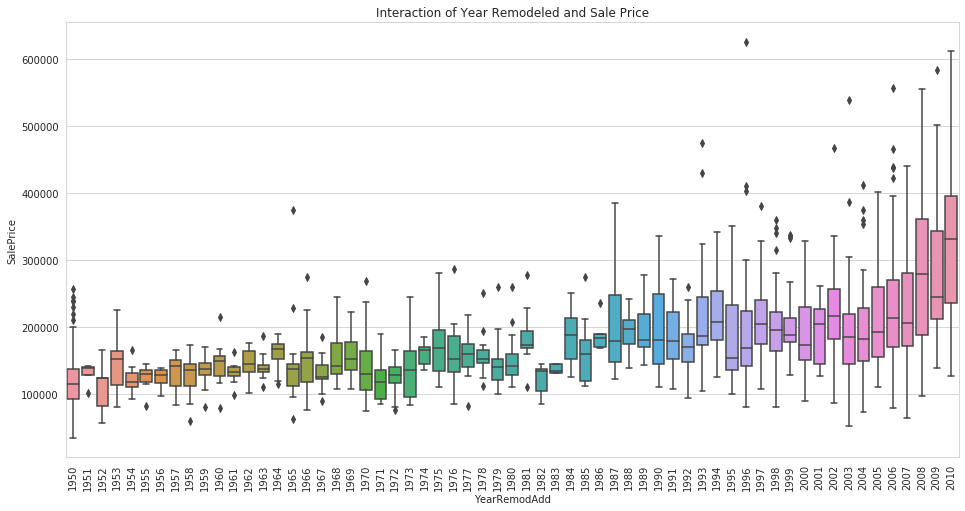

In [38]:
plt.figure(figsize = (16,8))
sns.boxplot(train["YearRemodAdd"], train["SalePrice"])

plt.xticks(rotation = "vertical")
plt.title("Interaction of Year Remodeled and Sale Price")

In [39]:
train[train["YearRemodAdd"] == train["YearBuilt"]]["Id"].count()

762

The plot above shows a less volatile relationship than the year built relationship. Additionally, these two variables share more than 50% of their observations. With these two facts in mind, I will most likely only use the year remodeled variable in the models.

This ends the section for variables highly correlated with the sale price. All other variables have a correlation coefficient of less than .5, so I won't be analyzing them specifically at this point. 

There are additional pairwise correlations in the data set which are above .5, and I'll now spend some time analyzing those which are notably high, as this will effect the models later on.

### Additional Correlation Analysis

Text(0.5, 1, 'Pairwise Correlation')

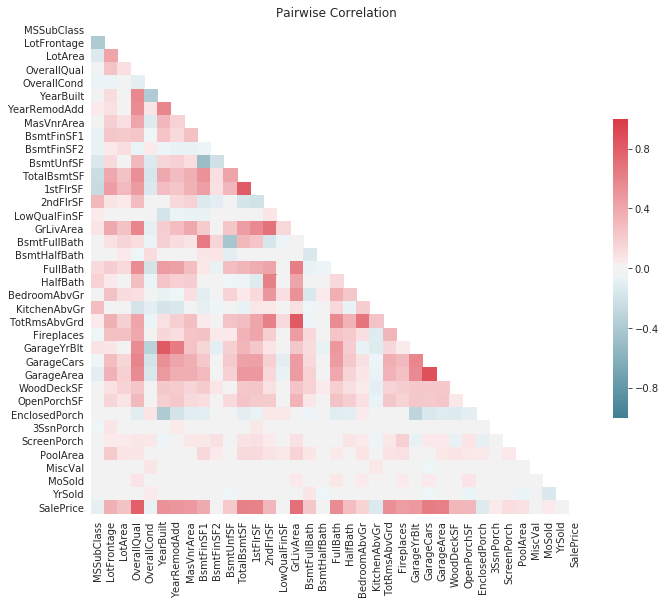

In [40]:
f, ax = plt.subplots(figsize=(11, 11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap = cmap,vmin = -1, vmax = 1, center = 0, square = True, cbar_kws={"shrink":0.5})
plt.title("Pairwise Correlation")

Just using the plot above it is simple to identify some of the highest correltions in the data set. 
It is clear that there are notably high correlations between,
* GarageArea & GarageCars (The SF of the garage and the garage size measured in car capacity)
* GarageYrBlt & YearBuilt (The year the garage was built, and the year the property was built)
* TotRmsAbvGrd & GrLivArea (The total rooms above ground level and the SF of the above ground living area)
* 1stFlrSF & TotalBsmtSF (The SF of the 1st floor, and the SF of the Basement)

#### Garage Area

In [41]:
corr["GarageArea"].sort_values(ascending=False)[1:6]

GarageCars     0.882475
SalePrice      0.623431
GarageYrBlt    0.564567
OverallQual    0.562022
1stFlrSF       0.489782
Name: GarageArea, dtype: float64

Text(0.5, 1.0, 'Interation of GarageArea and GarageCars')

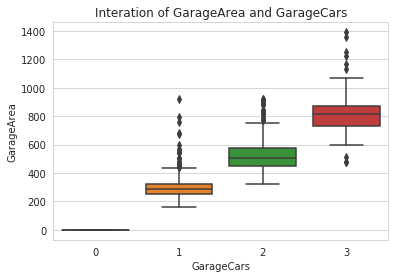

In [42]:
sns.boxplot(train["GarageCars"], train["GarageArea"])
plt.title("Interation of GarageArea and GarageCars")

In [43]:
train["GarageArea"].groupby(train["GarageCars"]).describe()

,count,mean,std,min,25%,50%,75%,max
GarageCars,,,,,,,,
0,81.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,369.0,300.517615,87.804287,160.0,250.0,288.0,325.0,924.0
2,823.0,518.705954,93.773585,320.0,450.0,506.0,576.0,924.0
3,183.0,813.213115,135.108517,478.0,729.0,818.0,870.0,1390.0


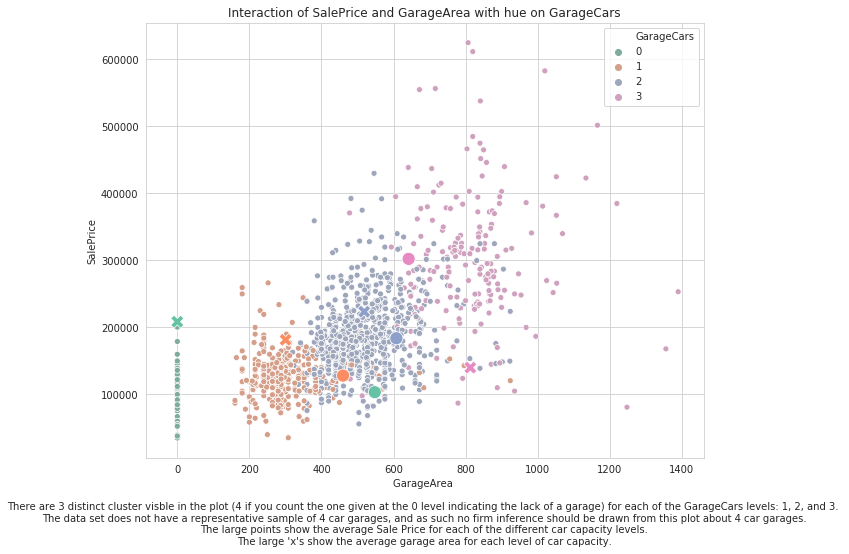

In [44]:
#Visualization of Garage area vs SalePrice
plt.figure(figsize = (10,8))
palette = sns.color_palette(palette="Set2", n_colors = 4, desat = 0.5)
palette2 = sns.color_palette(palette="Set2", n_colors = 4)
sns.scatterplot(train["GarageArea"], train["SalePrice"], hue = train["GarageCars"], palette= palette)
sns.scatterplot(train["GarageArea"], train["SalePrice"].groupby(train["GarageCars"]).describe()["mean"], hue = train["SalePrice"].groupby(train["GarageCars"]).describe()["mean"], s = 170, palette= palette2, legend=False)
sns.scatterplot(train["GarageArea"].groupby(train["GarageCars"]).describe()["mean"], train["SalePrice"], hue = train["GarageArea"].groupby(train["GarageCars"]).describe()["mean"], s = 170, palette = palette2, legend=False, marker = "X")
plt.xlabel("""GarageArea \n
There are 3 distinct cluster visble in the plot (4 if you count the one given at the 0 level indicating the lack of a garage) for each of the GarageCars levels: 1, 2, and 3. 
The data set does not have a representative sample of 4 car garages, and as such no firm inference should be drawn from this plot about 4 car garages.
The large points show the average Sale Price for each of the different car capacity levels.
The large 'x's show the average garage area for each level of car capacity.""")
plt.title("Interaction of SalePrice and GarageArea with hue on GarageCars")
plt.legend()
plt.savefig("Images/GarageArea_SalePrice_Scatter.png")

In [45]:
train["SalePrice"].groupby(train["GarageCars"]).describe()

,count,mean,std,min,25%,50%,75%,max
GarageCars,,,,,,,,
0,81.0,103317.283951,32815.023389,34900.0,82500.0,100000.0,124000.0,200500.0
1,369.0,128116.688347,30412.386890,35311.0,110000.0,128000.0,142000.0,266500.0
2,823.0,183880.645200,51641.823385,55993.0,148000.0,178000.0,213000.0,430000.0
3,183.0,302309.655738,97230.252326,81000.0,244800.0,290000.0,357000.0,625000.0


The correlation between GarageArea and GarageCars is the highest in the entire data set, with 88.25% of the variability in GarageArea being explained by GarageCars. 

The above scatterplot shows the interaction of SalePrice and GarageArea, with the hue showing the car capacity of the garages. While a rather logical relationship can be seen between both GarageArea and Sale Price as well as GarageCars and SalePrice, in those case where GarageArea is high and the car capacity is low, the sale price follows the trend set by GarageCars, rather than GarageArea. 

#### Year Built

In [46]:
corr["YearBuilt"].sort_values(ascending=False)[1:7]

GarageYrBlt     0.825667
YearRemodAdd    0.592855
OverallQual     0.572323
GarageCars      0.537850
SalePrice       0.522897
GarageArea      0.478954
Name: YearBuilt, dtype: float64

The second highest correlation in the data set is that of YearBuilt and GarageYrBlt, with a pearson correlation coefficient of .8257. 

In [47]:
yr_equal = train[train["YearBuilt"] == train["GarageYrBlt"]]["Id"].count()
yr_after = train[train["YearBuilt"] < train["GarageYrBlt"]]["Id"].count()
yr_before = train[train["YearBuilt"] > train["GarageYrBlt"]]["Id"].count()
print("YearBuilt and Garage Year built share %f percent (%d out of a total 1459(having removed the outlier)) of their observations." % (yr_equal/1459, yr_equal))
print("\nOf the remaining %d observations, %d of the garages were built after the property, while %d were built before. The remaining %d properties do not have garages." % (1459-yr_equal,yr_after, yr_before, 1459-(yr_equal+yr_after+yr_before)))

YearBuilt and Garage Year built share 0.743660 percent (1085 out of a total 1459(having removed the outlier)) of their observations.

Of the remaining 374 observations, 281 of the garages were built after the property, while 9 were built before. The remaining 84 properties do not have garages.


#### Total Rooms Above Ground (TotRmsAbvGrd)

In [48]:
corr["TotRmsAbvGrd"].sort_values(ascending=False)[1:7]

GrLivArea       0.825489
BedroomAbvGr    0.676620
2ndFlrSF        0.616423
FullBath        0.554784
SalePrice       0.533723
OverallQual     0.427452
Name: TotRmsAbvGrd, dtype: float64

The third highest correlation in the data set with a correlation coefficient of .8255 is that of TotRmsAbvGrd and GrLivArea. This makes perfect sense, as an increase of above ground rooms should logically results in an increase in above ground swuare footage. 

Text(0.5, 1.0, 'Interaction of Total Above Ground Rooms and Total Above Ground Square Footage')

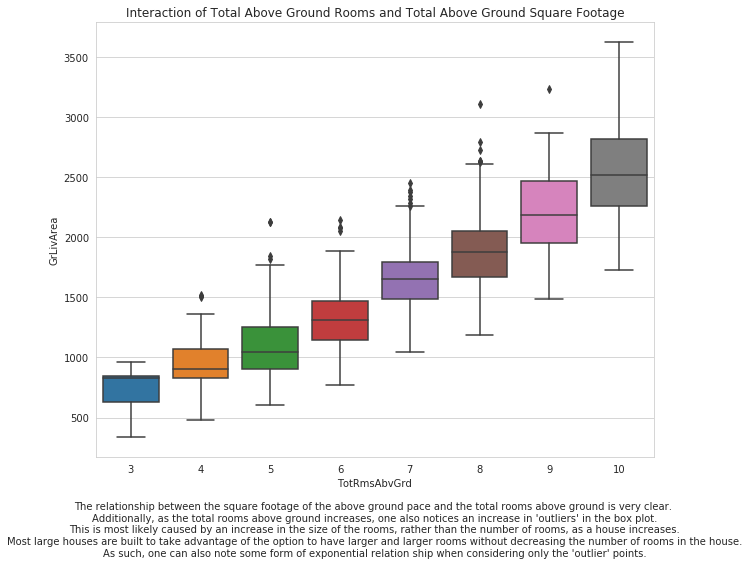

In [49]:
#Visualization of total above ground rooms and above ground living area
plt.figure(figsize = (10,8))
sns.boxplot(train["TotRmsAbvGrd"], train["GrLivArea"])
plt.xlabel("""TotRmsAbvGrd\n
The relationship between the square footage of the above ground pace and the total rooms above ground is very clear. 
Additionally, as the total rooms above ground increases, one also notices an increase in 'outliers' in the box plot.
This is most likely caused by an increase in the size of the rooms, rather than the number of rooms, as a house increases.
Most large houses are built to take advantage of the option to have larger and larger rooms without decreasing the number of rooms in the house.
As such, one can also note some form of exponential relation ship when considering only the 'outlier' points.""")
plt.title("Interaction of Total Above Ground Rooms and Total Above Ground Square Footage")

#### First Floor Square Footage (1stFlrSF)

In [50]:
corr["1stFlrSF"].sort_values(ascending=False)[1:6]

TotalBsmtSF    0.819530
SalePrice      0.605852
GrLivArea      0.566024
GarageArea     0.489782
OverallQual    0.476224
Name: 1stFlrSF, dtype: float64

Text(0.5, 1.0, 'Interaction of First Floor Square Footage and Basement Square Footage')

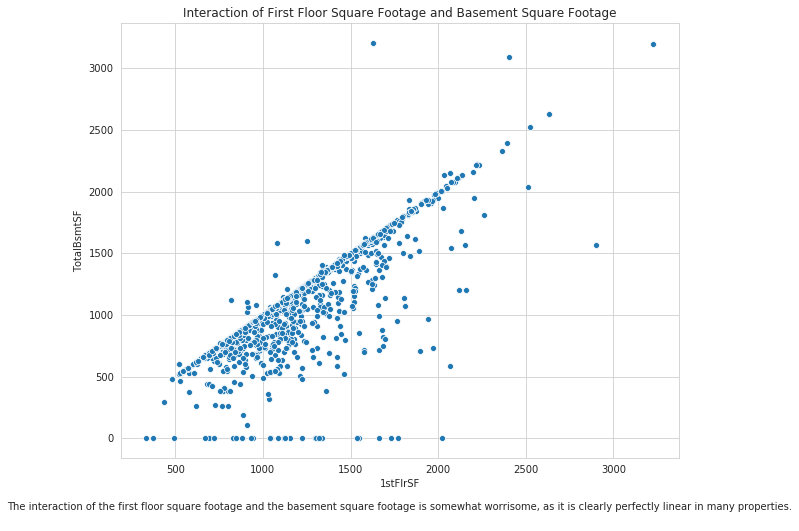

In [51]:
#Visualization of 1st floor sqf against basement sqf
plt.figure(figsize = (10,8))
sns.scatterplot(train["1stFlrSF"], train["TotalBsmtSF"])
plt.xlabel("""1stFlrSF\n
The interaction of the first floor square footage and the basement square footage is somewhat worrisome, as it is clearly perfectly linear in many properties.
""")
plt.title("Interaction of First Floor Square Footage and Basement Square Footage")

Although the basment and first floor square footage variables don't have the highest correlation in the data set, they have one of the most worrying relatioships. The perfect linear reltioship visible in the above plot is notably concerning. To avoid the multitude of issues which can arise from variables with clear functional relationships, I'll only be using the 1stFlrSF variable in my analysis. 

I'll be using 1stFlrSF, rather than the Basement variable, as there are a notable number of properties which do not have basements, whereas all properties (logically) have a first floor.

This concludes the analysis of the highly correlated variables. I'll be splitting the analysis file up from here, as this is the most import aspect of the analysis as a whole. The remaining analysis files will cover plots of each individual variable, by data dtype, such that I have a reference for any interesting behaviors.

## Additional Variable Review and Transformation

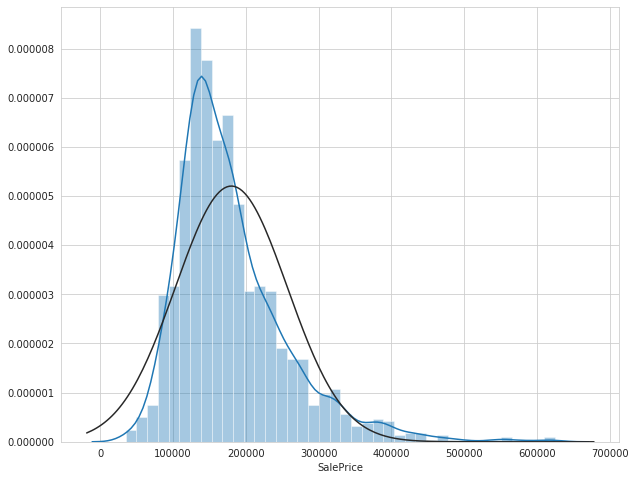

In [52]:
from scipy.stats import norm
fig = plt.figure(figsize = (10,8))
sns.distplot(train['SalePrice'], fit=norm);

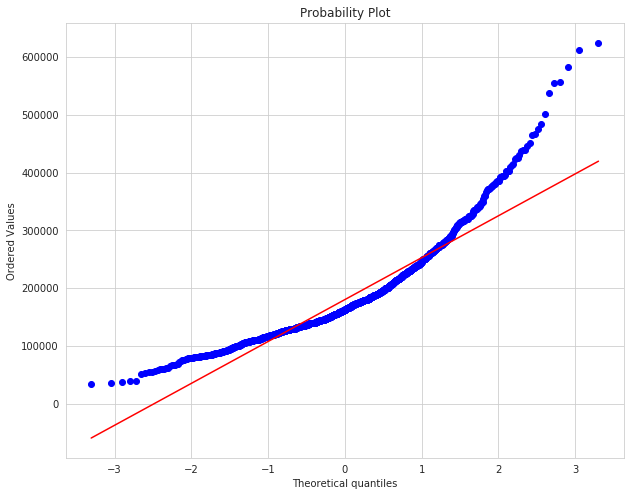

In [53]:
fig = plt.figure(figsize = (10,8))
res = stats.probplot(train['SalePrice'], plot=plt)

I'm going to apply a log transformation to the sales price, to induce a more linear interaction in the above plot.

In [54]:
train["SalePrice_log"] = np.log(train["SalePrice"])

Text(0.5, 1.0, 'Log transform of SalePrice')

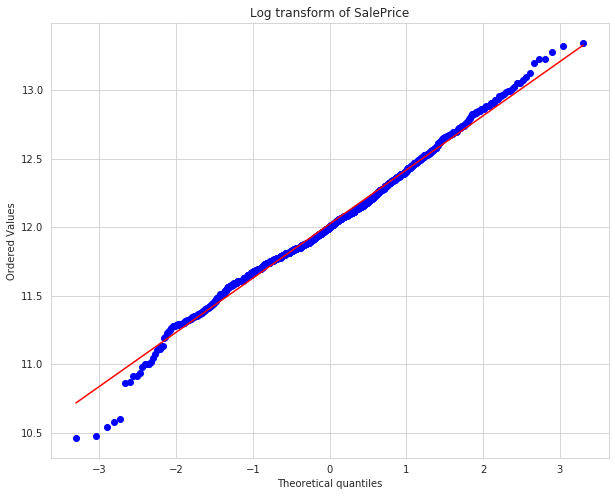

In [55]:
fig = plt.figure(figsize = (10,8))
res = stats.probplot(train['SalePrice_log'], plot=plt)
plt.title("Log transform of SalePrice")

#### Box Cox

In [75]:
from scipy.special import boxcox1p
train["SalePrice_box_cox"] = boxcox1p(train["SalePrice"], .15)

Text(0.5, 1.0, 'Box Cox transform of SalePrice')

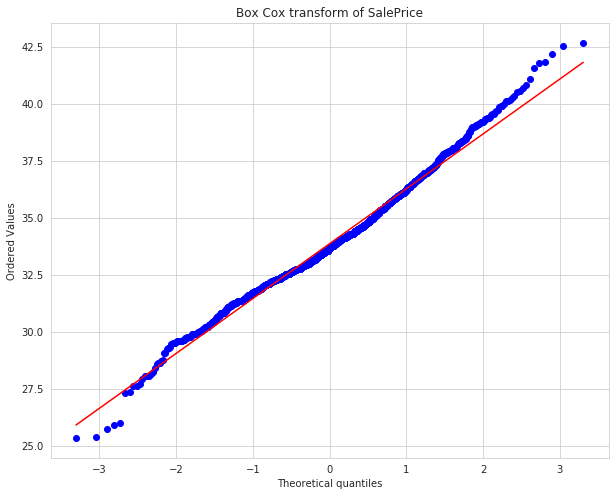

In [77]:
fig = plt.figure(figsize = (10,8))
res = stats.probplot(train['SalePrice_box_cox'], plot=plt)
plt.title("Box Cox transform of SalePrice")

It looks like the log transform on the sales price is more effective than the box cox.

#### Total Square Foot Tansformations

The first two plot displayed below are the distribution of the untransformed total square foot variable, fit with the distribution aproximation in blue, and a true normal distribution in black. Below that is the probability plot of the untransformed feature.

In [58]:
train["TotSqFt"] = train["GrLivArea"] + train["TotalBsmtSF"]

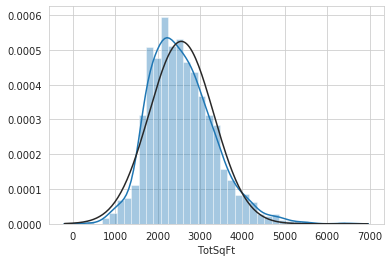

In [59]:
sns.distplot(train["TotSqFt"], fit = norm)

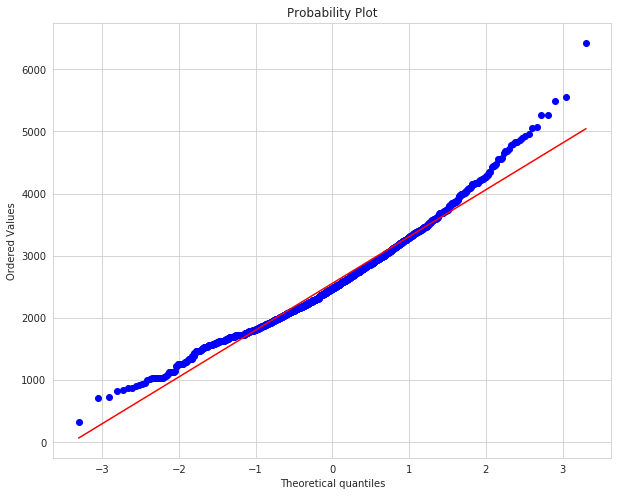

In [60]:
fig = plt.figure(figsize = (10,8))
res = stats.probplot(train['TotSqFt'], plot=plt)

Now let's test two different transformation - The natural log, and the box cos transformation

#### Natural Log

In [61]:
train["TotSqFt_log"] = np.log(train["TotSqFt"])

Text(0.5, 1.0, 'Log transform of TotSqFt')

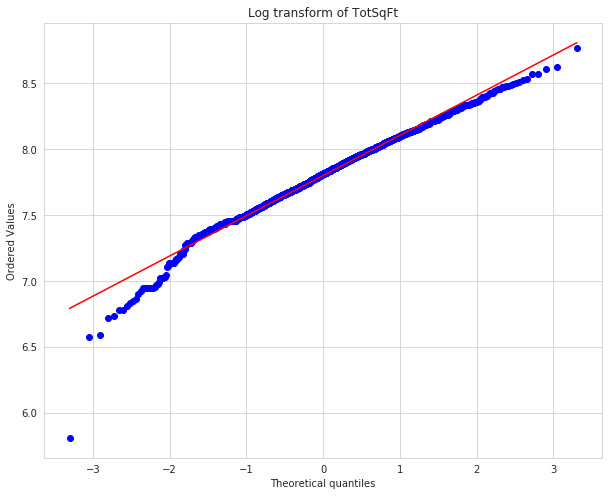

In [62]:
fig = plt.figure(figsize = (10,8))
res = stats.probplot(train['TotSqFt_log'], plot=plt)
plt.title("Log transform of TotSqFt")

#### Box Cox

In [78]:
train["TotSqFt_box_cox"] = boxcox1p(train["TotSqFt"], .35)

Text(0.5, 1.0, 'Box Cox transform of (1456, 86)')

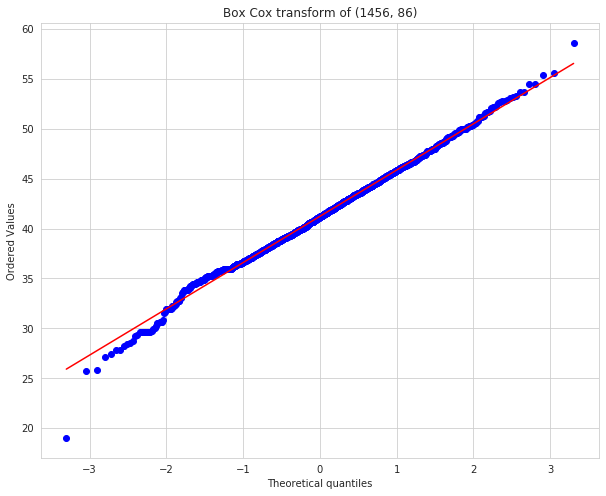

In [80]:
fig = plt.figure(figsize = (10,8))
res = stats.probplot(train['TotSqFt_box_cox'], plot=plt)
plt.title("Box Cox transform of"))

The Box Cox does a notably better job of transformng the total square foot feature to a normal distribution. See the distribution below.

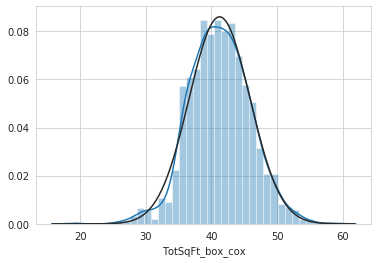

In [65]:
sns.distplot(train["TotSqFt_box_cox"], fit = norm)